# Riometer readfile

In [1]:
import urllib.request
import datetime as dt

# define riometer readfile function
def rio_readfile(url):

    # Define lists
    date = [] #do i even need the date cause it's the same year?
    time = []
    absorption = []
    raw_sig = []

    # Define filename
    #filename = "RD 2012-03-03.txt"

    # open file to read
    response = urllib.request.urlopen(url)
    html_response = response.read()
    encoding = response.headers.get_content_charset("utf-8")
    fp = html_response.decode(encoding)

    # define new list sanitized_data
    # entry = [] list defined later, append datetime, absp, raw sig to it
    # later append entry to sanitized_data so it will be lists within a list
    sanitized_data = []
    
    for line in fp.splitlines():
        #print(line)
        #print(str(line))
    
        # skip comments
        if line[0] == "#":
            continue
        else:
            
            # strip line
            line_strip = line.strip()
            # split lines into lists
            line_split = line.split()
            #print(line_split[1])

            # Define datetime format for date and time
            
            format = "%d%m%Y%H:%M:%S"
            
            # split column 0 to month, date, year and make one row
            month = str(line_split[0].split("/")[1])
            day = str(line_split[0].split("/")[0])
            year = "20" + str(line_split[0].split("/")[2])
                      
            full_date = day + month + year + str(line_split[1])
            
            # Try-except to see if can convert to datetime
            try:
                res = bool(dt.datetime.strptime(full_date, format))
                this_time = dt.datetime.strptime(full_date, format)
                
                # Get rid of negative absorption values
                if float(line_split[2]) < 0:
                    continue
                # Only append line to list if time checks true

                # append time to array
                time.append(this_time)
                # append absorption to array
                absorption.append(float(line_split[2]))
                # append raw signals to array
                raw_sig.append(line_split[3])

                # define new list 
                entry = []
                entry.append(this_time)
                entry.append(line_split[2])
                entry.append(line_split[3])
                
                sanitized_data.append(entry)
                    
            except ValueError:
                res = False

    #return sanitized_data
    return sanitized_data
    #return absorption
    #return raw_sig

# Ionosonde readfile

In [2]:
## Import stuff
import numpy as np

def ionosonde_plotter(f):
    # Define timestamp array
    timestamp_full = []

    # Minimum virtual height of E trace
    sanitized_hE = []
    # Minimum virtual height of Es trace
    sanitized_hEs = []
    # Define CS array
    CS = []

    # E layer critical frequency
    sanitized_foE = []
    # Es layer critical frequency
    sanitized_foEs = []


    # Define filename
    filename = f

    # define indices for each parameter of file
    time_idx = 0
    CS_idx = 1
    foEs_idx = 2
    foE_idx = 4
    hE_idx = 6
    hEs_idx = 8

    # Define format for datetime
    format = "%Y-%m-%dT%H:%M:%S.%fZ"

    # Open file - read
    fp = f
    # Read every line in file
    for line in fp:
    # Skip comments
        if line[0] == "#":
            continue
    # Strip lines
        else:
            line_strip = line.strip()
    # Split lines into lists
            line_split = line.split()

            foE_str = line_split[foE_idx]
            foEs_str = line_split[foEs_idx]
            hE_str = line_split[hE_idx]
            hEs_str = line_split[hEs_idx]

            timestamp_full.append(dt.datetime.strptime(line_split[time_idx], format))

            # Check if can convert foE to float
            try:
                foE_float = float(foE_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_foE.append([timestamp_datetime, foE_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if can convert foEs to float
            try:
                foEs_float = float(foEs_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_foEs.append([timestamp_datetime, foEs_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if hE can convert to float
            try:
                hE_float = float(hE_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_hE.append([timestamp_datetime, hE_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

            # Check if hEs can convert to float
            try:
                hEs_float = float(hEs_str)
                # Extract timestamp and append to the array
                timestamp_str = line_split[time_idx]
                timestamp_datetime = dt.datetime.strptime(timestamp_str, format)
                sanitized_hEs.append([timestamp_datetime, hEs_float])
            except ValueError:
                # If the conversion fails, ignore the line
                pass

    return sanitized_hEs, sanitized_foEs


# The 12 UT days in datetime format - list

In [38]:
# List the days needed as strings
import datetime as dt

format = "%Y-%m-%d"
##### 1.  2012-01-23
##### 2.  2012-02-07
##### 3.  2012-03-01
##### 4.  2012-03-07
##### 5.  2012-03-08
##### 6.  2012-03-13
##### 7.  2012-03-15
##### 8.  2012-04-03
##### 9.  2012-04-25
##### 10. 2012-07-06
##### 11. 2012-11-01
##### 12. 2012-11-07
days_to_analyze_string = ["2012-01-23", "2012-02-07", "2012-03-01", "2012-03-07", "2012-03-08", "2012-03-13", "2012-03-15", "2012-04-03", "2012-04-25", "2012-07-06", "2012-11-01", "2012-11-07"]

days_to_analyze = []

for day in days_to_analyze_string:
    day_datetime = dt.datetime.strptime(day, format)
    days_to_analyze.append(day_datetime)

print(days_to_analyze_string)

['2012-01-23', '2012-02-07', '2012-03-01', '2012-03-07', '2012-03-08', '2012-03-13', '2012-03-15', '2012-04-03', '2012-04-25', '2012-07-06', '2012-11-01', '2012-11-07']


# Avg foEs/hEs per hour

In [4]:
import os
from collections import defaultdict
import math

graph_plot_dict = defaultdict(lambda: {"hour": -1, "avg_hEs": 0, "avg_foEs": 0, "avg_absp": -1})

directory = r"C:\Users\minod\OneDrive\Documents\UCalgary\Winter 2024\phys 598 - thesis\Jupyter files\Final paper\Riometer seasonal track\Trends\txt files"
for ionosonde_txt_file in os.listdir(directory):

  
    current_hour = None
    measurement_count = 0
    hEs_total = None
    foEs_total = None
    current_max = None

    
    if ionosonde_txt_file.endswith(".txt"):
        with open(os.path.join(directory, ionosonde_txt_file)) as f:
            
            # get san data for each file
            sanitized_hEs, sanitized_foEs = ionosonde_plotter(f)

            # for each list - [0]: datetime, [1]: hEs val
            for measurement in sanitized_hEs:
                # set first ever current_hour
                if current_hour == None:
                    current_hour = int(measurement[0].hour)
                    
                # if within the hour we are looking at
                if int(measurement[0].hour) == current_hour:
                    try:
                        hEs_value = float(measurement[1])
                        if not math.isnan(hEs_value): # because NaN values get converted to math.isnan or something
                            if not current_max: # because first max of an hour is None so set that to max between absorptionval and 0
                                current_max = max(hEs_value,0)
                            else:
                                current_max = max(hEs_value, current_max)
                            # if there is no absp total yet, set it
                            if hEs_total == None: # absorption total can be None
                                hEs_total = hEs_value
                            else:
                                # sum
                                hEs_total += hEs_value
                    except ValueError:
                        pass
                    measurement_count += 1
                else: # when the end of one hour comes
                    if hEs_total: # if condition only if absorption value is not still None
                        # append values of the hour we're looking at
                        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_hEs"] = hEs_total/measurement_count
                        #graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max
                        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["hour"] = current_hour
        
                        #avg_absorption_list.append([measurement[0].date(), current_hour, absorption_total/measurement_count, current_max])
        
                    current_hour = int(measurement[0].hour) # set new hour
                    # do the same absorption stuff again
                    current_max = None
                    try:
                        if not math.isnan(float(measurement[1])):
                            hEs_total = float(measurement[1])
                            measurement_count = 1
                    except ValueError:
                        measurement_count = 0
                        hEs_total = None
                    
        
            if hEs_total:
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_hEs"] = hEs_total/measurement_count

                #graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max



            # for each list - [0]: datetime, [1]: absp value, [2]: raw signal
            for measurement in sanitized_foEs:
                # set first ever current_hour
                if current_hour == None:
                    current_hour = int(measurement[0].hour)
                    
                # if within the hour we are looking at
                if int(measurement[0].hour) == current_hour:
                    try:
                        foEs_value = float(measurement[1])
                        if not math.isnan(foEs_value): # because NaN values get converted to math.isnan or something
                            if not current_max: # because first max of an hour is None so set that to max between absorptionval and 0
                                current_max = max(foEs_value,0)
                            else:
                                current_max = max(foEs_value, current_max)
                            # if there is no absp total yet, set it
                            if foEs_total == None: # absorption total can be None
                                foEs_total = foEs_value
                            else:
                                # sum
                                foEs_total += foEs_value
        
                    except ValueError:
                        pass
                    measurement_count += 1
                else: # when the end of one hour comes
                    if foEs_total: # if condition only if absorption value is not still None
                        # append values of the hour we're looking at
                        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_foEs"] = foEs_total/measurement_count
                        #graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max
                        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["hour"] = current_hour

                            #avg_absorption_list.append([measurement[0].date(), current_hour, absorption_total/measurement_count, current_max])
        
                    current_hour = int(measurement[0].hour) # set new hour
                    # do the same absorption stuff again
                    current_max = None
                    try:
                        if not math.isnan(float(measurement[1])):
                            foEs_total = float(measurement[1])
                            measurement_count = 1
                    except ValueError:
                        measurement_count = 0
                        foEs_total = None
                    
        
            if foEs_total:
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_foEs"] = foEs_total/measurement_count

                #graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max

        

# Avg absorption per hour

In [5]:
# looping through each day
for date in days_to_analyze:
    current_hour = None
    measurement_count = 0
    absorption_total = None
    current_max = None

    year_str = str(date.year)
    month_str = str(date.month).zfill(2)
    day_str = str(date.day).zfill(2)

    # absolutely no reason to have this but whatever
    #sanitized_data_list_name = f"sanitized_data_{date.strftime("%Y%m%d")}"
    #globals()[sanitized_data_list_name] = sanitized_data
    #all_12_sanitized_data.append(sanitized_data)
    
    new_base = "https://data.phys.ucalgary.ca/sort_by_project/GO-Canada/GO-Rio/txt/{year}/{month}/{day}/norstar_k2_rio-daws_{year}{month}{day}_v01.txt"

    # get san data for rio file
    sanitized_data = rio_readfile(new_base.format(year=year_str, month=month_str, day=day_str))

    # for each list - [0]: datetime, [1]: absp value, [2]: raw signal
    for measurement in sanitized_data:
        # set first ever current_hour
        if current_hour == None:
            current_hour = int(measurement[0].hour)
            
        # if within the hour we are looking at
        if int(measurement[0].hour) == current_hour:
            try:
                absorption_value = float(measurement[1])
                if not math.isnan(absorption_value): # because NaN values get converted to math.isnan or something
                    if not current_max: # because first max of an hour is None so set that to max between absorptionval and 0
                        current_max = max(absorption_value,0)
                    else:
                        current_max = max(absorption_value, current_max)
                    # if there is no absp total yet, set it
                    if absorption_total == None: # absorption total can be None
                        absorption_total = absorption_value
                    else:
                        # sum
                        absorption_total += absorption_value

            except ValueError:
                pass
            measurement_count += 1
        else: # when the end of one hour comes
            if absorption_total: # if condition only if absorption value is not still None
                # append values of the hour we're looking at
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_absp"] = absorption_total/measurement_count
                #graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["peak_absp"] = current_max
                graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["hour"] = current_hour

                #avg_absorption_list.append([measurement[0].date(), current_hour, absorption_total/measurement_count, current_max])

            current_hour = int(measurement[0].hour) # set new hour
            # do the same absorption stuff again
            current_max = None
            try:
                if not math.isnan(float(measurement[1])):
                    absorption_total = float(measurement[1])
                    measurement_count = 1
            except ValueError:
                measurement_count = 0
                absorption_total = None
            

    if absorption_total:
        graph_plot_dict[f"{measurement[0].date()}:{current_hour}"]["avg_absp"] = absorption_total/measurement_count


In [ ]:
print(graph_plot_dict)

# Plots

In [39]:
#sort graph plot dict by key

sorted_keys = sorted(graph_plot_dict.keys())

graph_plot_dict = {key: graph_plot_dict[key] for key in sorted_keys}

## hEs

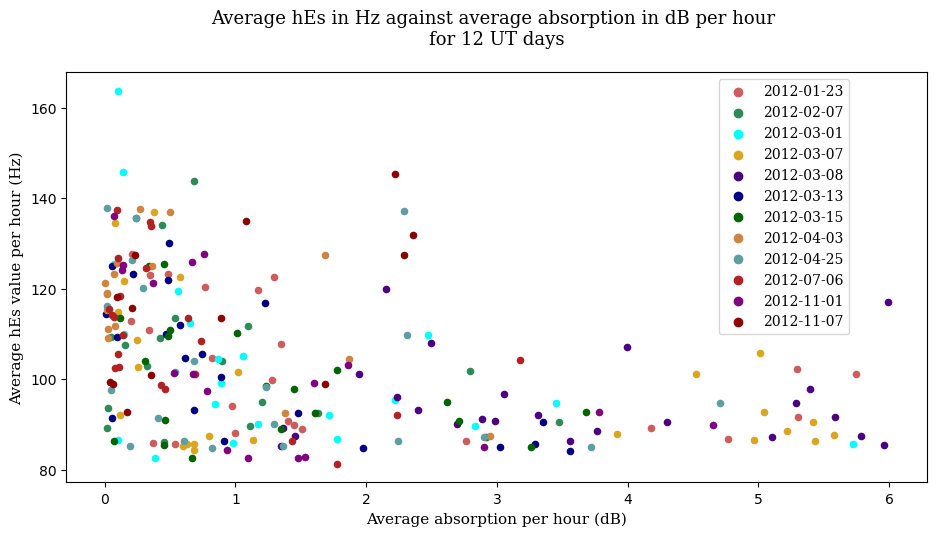

In [48]:
import matplotlib.pyplot as plt

colors = ['indianred','seagreen','cyan','goldenrod','indigo','navy','darkgreen','peru','cadetblue','firebrick','purple','darkred']

#graph_plot_dict = defaultdict(lambda: {"hour": -1, "avg_hEs": 0, "avg_foEs": 0, "avg_absp": -1})
plt.figure(figsize=(10,6))

for key, value in graph_plot_dict.items():
    if value["avg_hEs"] != 0 and value["avg_absp"] != -1:
        absp_xaxis_hEs = value["avg_absp"]
        hEs_yaxis = value["avg_hEs"]

        date_string = key.split(":")[0]
       
        for index, day in enumerate(days_to_analyze_string):
            if date_string == day:
                plt.scatter(absp_xaxis_hEs, hEs_yaxis, s=20, c=colors[index])

for day, color in zip(days_to_analyze_string, colors):
    plt.scatter([],[], c=color, alpha=1, label=day)

#days_to_analyze_string = ["2012-01-23", "2012-02-07", "2012-03-01", "2012-03-07", "2012-03-08", "2012-03-13", "2012-03-15", "2012-04-03", "2012-04-25", "2012-07-06", "2012-11-01", "2012-11-07"]


plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11}) 
plt.ylabel("Average hEs value per hour (Hz)", fontdict={'family': 'serif', 'size': 11}) 
plt.title("Average hEs in Hz against average absorption in dB per hour \nfor 12 UT days",pad=20, fontdict={'family': 'serif', 'size': 13})
plt.legend(bbox_to_anchor=(0.75, 1), loc='upper left', prop={'family': 'serif', 'size': 10})
#plt.legend([for color in colors], [for days in days_to_analyze_string])

plt.tight_layout(pad=3.0)
plt.savefig("hourly_avg hEs vs absp.png")
plt.show()


## foEs

indianred 2012-01-23 2012-01-23:0 1.885 0.536625
indianred 2012-01-23 2012-01-23:1 1.775 0.37270349650349643
indianred 2012-01-23 2012-01-23:10 1.8166666666666667 1.1702819444444452
indianred 2012-01-23 2012-01-23:11 1.865 1.5106760168302933
indianred 2012-01-23 2012-01-23:12 1.6775 1.2780152777777767
indianred 2012-01-23 2012-01-23:13 1.9075 1.350188888888888
indianred 2012-01-23 2012-01-23:14 1.8875 1.2911694444444461
indianred 2012-01-23 2012-01-23:15 1.8775 1.3986713286713273
indianred 2012-01-23 2012-01-23:16 1.81 0.9935291666666668
indianred 2012-01-23 2012-01-23:17 1.7999999999999998 1.4449277777777774
indianred 2012-01-23 2012-01-23:18 1.99 2.766133333333336
indianred 2012-01-23 2012-01-23:19 1.95 4.177806993006988
indianred 2012-01-23 2012-01-23:2 3.80625 0.3353342657342657
indianred 2012-01-23 2012-01-23:20 1.8733333333333333 4.765973611111113
indianred 2012-01-23 2012-01-23:21 1.8833333333333335 5.293345833333333
indianred 2012-01-23 2012-01-23:22 2.048 5.7491194444444345
in

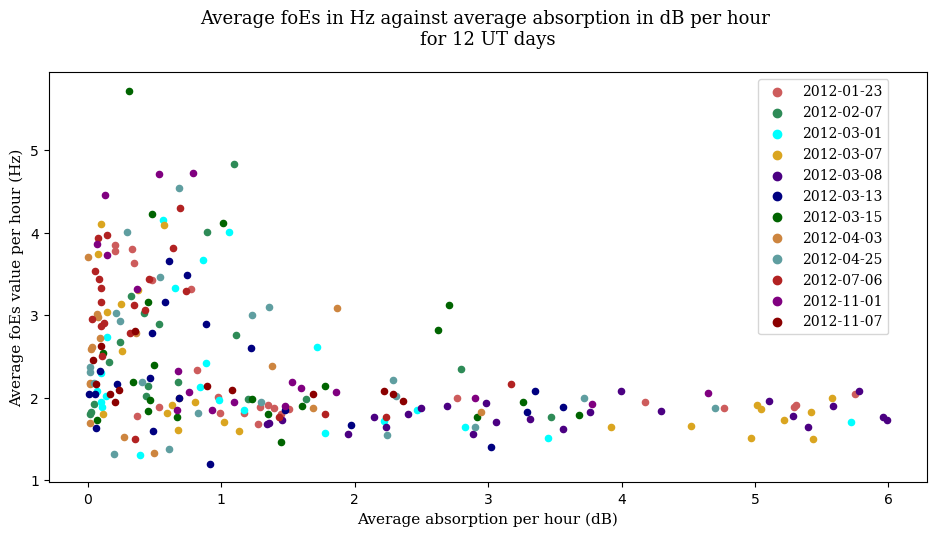

In [53]:
colors = ['indianred','seagreen','cyan','goldenrod','indigo','navy','darkgreen','peru','cadetblue','firebrick','purple','darkred']

#graph_plot_dict = defaultdict(lambda: {"hour": -1, "avg_hEs": 0, "avg_foEs": 0, "avg_absp": -1})
plt.figure(figsize=(10,6))



for key, value in graph_plot_dict.items():
    if value["avg_foEs"] != 0 and value["avg_absp"] != -1:
        absp_xaxis_foEs = value["avg_absp"]
        foEs_yaxis = value["avg_foEs"]

        date_string = key.split(":")[0]
       
        for index, day in enumerate(days_to_analyze_string):
            if date_string == day:
                print(colors[index], day, key, foEs_yaxis, absp_xaxis_foEs)
                plt.scatter(absp_xaxis_foEs, foEs_yaxis, s=20, c=colors[index])

for day, color in zip(days_to_analyze_string, colors):
    plt.scatter([],[], c=color, alpha=1, label=day)

#days_to_analyze_string = ["2012-01-23", "2012-02-07", "2012-03-01", "2012-03-07", "2012-03-08", "2012-03-13", "2012-03-15", "2012-04-03", "2012-04-25", "2012-07-06", "2012-11-01", "2012-11-07"]


plt.xlabel("Average absorption per hour (dB)", fontdict={'family': 'serif', 'size': 11}) 
plt.ylabel("Average foEs value per hour (Hz)", fontdict={'family': 'serif', 'size': 11}) 
plt.title("Average foEs in Hz against average absorption in dB per hour \nfor 12 UT days",pad=20, fontdict={'family': 'serif', 'size': 13})
plt.legend(bbox_to_anchor=(0.8, 1), loc='upper left', prop={'family': 'serif', 'size': 10})
#plt.legend([for color in colors], [for days in days_to_analyze_string])

plt.tight_layout(pad=3.0)
plt.savefig("hourly_avg foEs vs absp.png")
plt.show()
